In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Data.csv', index_col = [0,1])

In [3]:
df_2 = data.drop(columns=['First_sector_GDP', 'Third_sector_GDP', 'total_GDP', 'total_Investment', 'First_sector_Inv', 'Third_sector_Inv'])

In [4]:
df_2 

ED  Expenditure   Irate  Population        Tax  \
Country Year                                                            
Austria 1994   849432.583    55.486122  6.8167   7928746.0  43.985937   
        1995   882550.058    56.000000  7.1067   7943489.0  43.100000   
        1996   961798.352    56.000000  5.1067   7953067.0  44.600000   
        1997   950097.615    52.700000  4.4192   7964966.0  45.300000   
        1998   971582.690    52.600000  3.9058   7971116.0  45.300000   
...                   ...          ...     ...         ...        ...   
Spain   2019  3641677.147    42.000000 -0.2173  46918951.0  35.200000   
        2020  3288511.875    51.400000 -0.3057  47318050.0  37.300000   
        2021  3542616.185    49.500000 -0.4906  47400798.0  38.100000   
        2022  3472923.261    46.400000  1.0997  47486843.0  37.500000   
        2023  3443773.026    45.400000  3.8647  48085361.0  37.000000   

                    Trade  Second_sector_GDP  Second_sector_Inv  
Country Year                                                     
Austria 1994  -3065.82896       71868.968786       14845.832899  
        1995  -2194.40000       72896.200000       14795.000000  
        1996  -2963.70000       73911.900000       15755.700000  
        1997  -1524.50000       74842.400000       16539.600000  
        1998   -439.00000       77009.900000       16308.900000  
...                   ...                ...                ...  
Spain   2019  37422.00000      255352.000000       67392.000000  
        2020  17118.00000      224699.000000       57766.000000  
        2021  12226.00000      232756.000000       53513.000000  
        2022  12125.00000      244955.000000       55474.000000  
        2023  58836.00000      247792.000000       58563.038791  

[600 rows x 8 columns]

In [5]:
df_2.isnull().sum()

ED                   0
Expenditure          0
Irate                0
Population           0
Tax                  0
Trade                0
Second_sector_GDP    0
Second_sector_Inv    0
dtype: int64

In [6]:
columns = df_2.columns
columns

Index(['ED', 'Expenditure', 'Irate', 'Population', 'Tax', 'Trade',
       'Second_sector_GDP', 'Second_sector_Inv'],
      dtype='object')

# Ridge Regression for all data

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

features_columns = ['ED', 'Expenditure', 'Irate', 'Population', 'Tax', 'Trade', 'Second_sector_Inv']

X = df_2[features_columns]
y = df_2['Second_sector_GDP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [8]:
Coefficients = model.coef_

In [9]:
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)

In [10]:
print(f"test_score {test_score * 100 : 0.4f}")
print(f"train_score {train_score * 100 : 0.4f}")

test_score  98.8341
train_score  98.8976


In [11]:
Feature_Importance_linear_Ridge = pd.DataFrame({"Feature": features_columns, "Importance": Coefficients})

In [12]:
Feature_Importance_linear_Ridge

,Feature,Importance
0,ED,76745.041106
1,Expenditure,3620.321871
2,Irate,4109.944352
3,Population,1245.372699
4,Tax,-7293.695960
5,Trade,16905.575306
6,Second_sector_Inv,114927.553955


# Visualization result

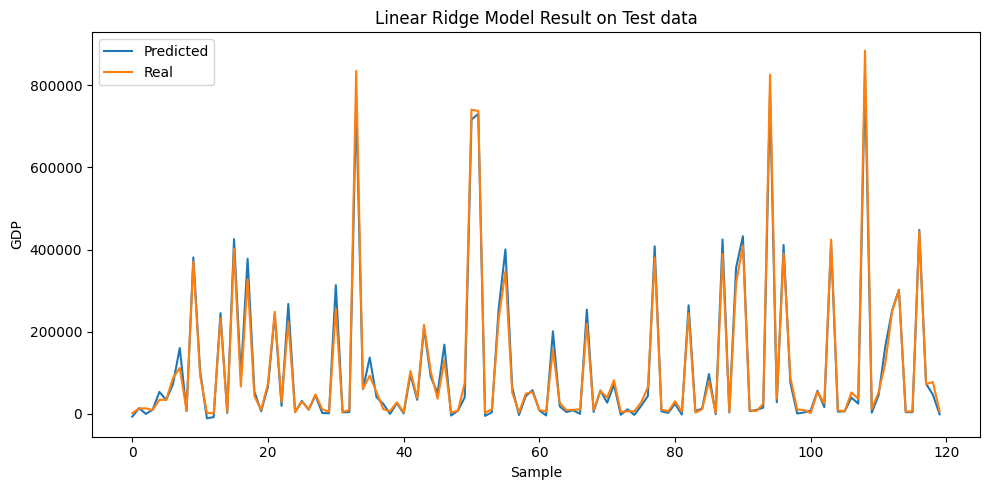

In [13]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 5))
plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label= "Real")
plt.title("Linear Ridge Model Result on Test data")
plt.xlabel("Sample")
plt.ylabel("GDP")
plt.legend()
plt.tight_layout()
plt.savefig('Linear_predict.png', dpi = 300)
plt.show()
           

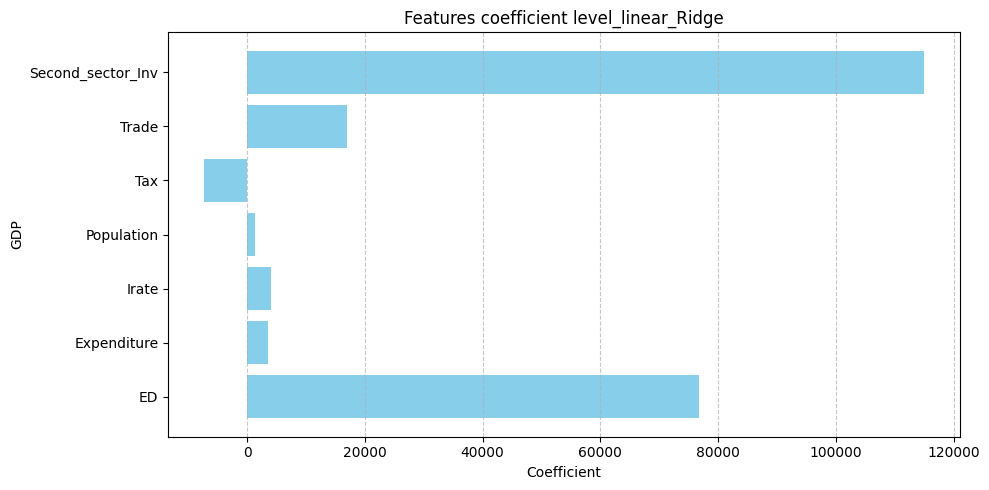

In [14]:
plt.figure(figsize = (10,5))
plt.barh(Feature_Importance_linear_Ridge["Feature"], Feature_Importance_linear_Ridge ["Importance"], color = 'skyblue')
plt.xlabel('Coefficient')
plt.ylabel('GDP')
plt.grid(axis='x', linestyle = '--', alpha = 0.7)
plt.title('Features coefficient level_linear_Ridge')
plt.tight_layout()
plt.savefig('Linear_coefficients.png', dpi = 300)
plt.show()


# polynomial Ridge Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree= degree, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = Ridge()
model.fit(X_train_poly, y_train)


Ridge()

In [16]:
test_score = model.score(X_test_poly, y_test)
train_score = model.score(X_train_poly, y_train)

In [17]:
print(f"test score: {test_score * 100: .4f}")
print(f"train score: {train_score * 100: .4f}")

test score:  99.5738
train score:  99.7242


In [18]:
coefficients = model.coef_

In [19]:
poly_features_name = poly.get_feature_names_out(features_columns)

In [20]:
Feature_Importance_PolyRodge = pd.DataFrame({"Features": poly_features_name, "Coefficients": coefficients})
Feature_Importance_PolyRodge 

,Features,Coefficients
0,ED,42936.991684
1,Expenditure,-1092.406750
2,Irate,2632.837506
3,Population,29802.214323
4,Tax,-4044.288628
5,Trade,3884.973505
6,Second_sector_Inv,106338.769610
7,ED^2,-2813.951966
8,ED Expenditure,-7200.412584
9,ED Irate,-19883.937177


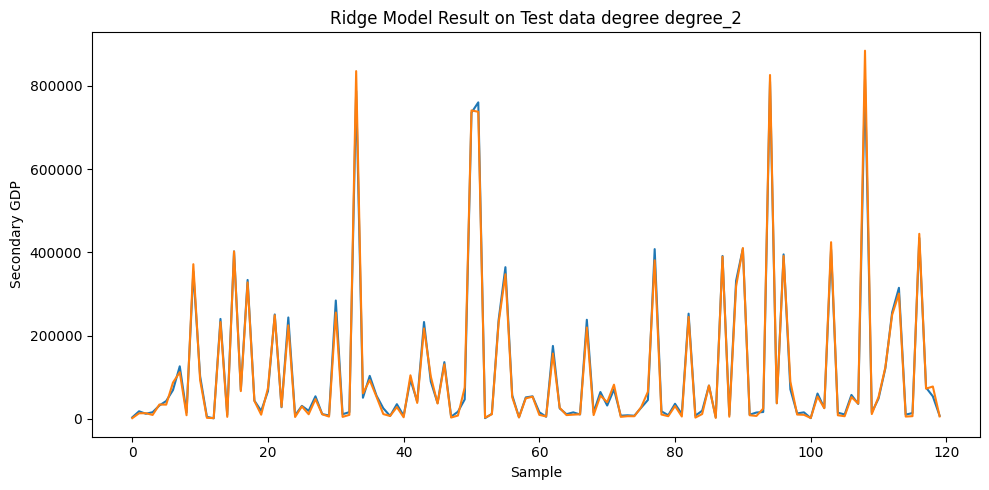

In [21]:
y_pred = model.predict(X_test_poly)

plt.figure(figsize = (10,5))
plt.plot(y_pred, label = "Predicted")
plt.plot(y_test.values, label = "Real")
plt.xlabel("Sample")
plt.ylabel("Secondary GDP")
plt.title("Ridge Model Result on Test data degree degree_2")
plt.tight_layout()
plt.savefig('poly_predict.png', dpi = 300)
plt.show()

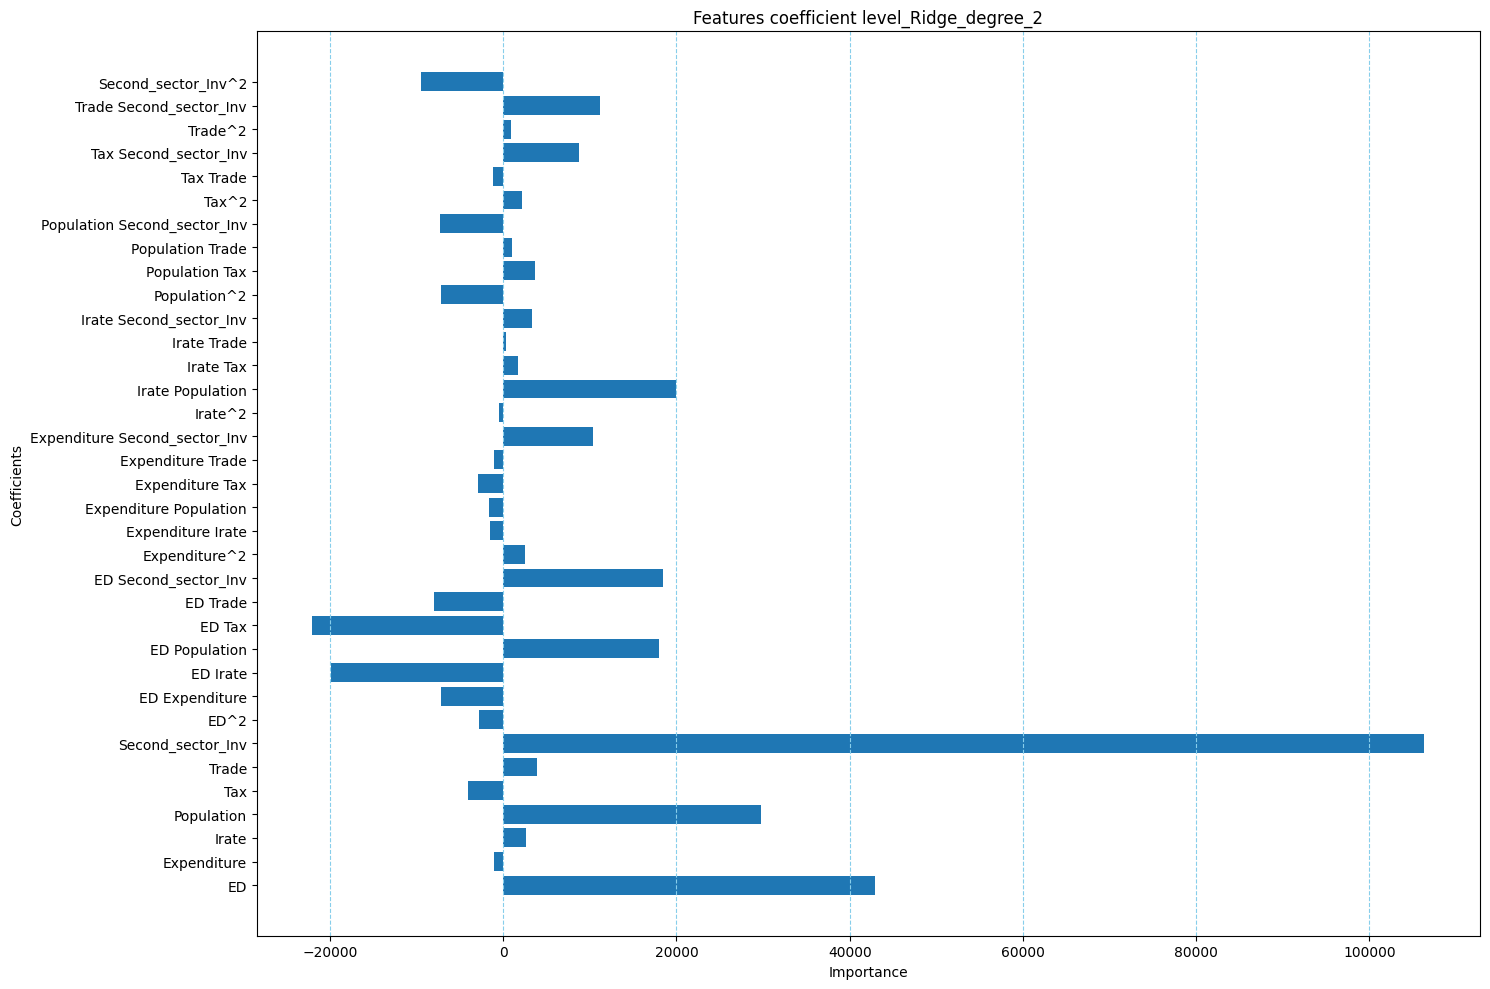

In [22]:
plt.figure(figsize = (15, 10))
plt.barh(Feature_Importance_PolyRodge['Features'], Feature_Importance_PolyRodge['Coefficients'])
plt.xlabel('Importance')
plt.ylabel('Coefficients')
plt.title('Features coefficient level_Ridge_degree_2')
plt.tight_layout()
plt.grid(axis = 'x', linestyle = '--', color = 'skyblue')
plt.savefig('poly_coefficients.png', dpi = 300)
# plt.grid(axis = 'y', linestyle = '--', color = 'skyblue')
plt.show()

# First difference and modeling